# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [18]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
sys.path.append('../../External_Functions')            # Path to the external functions
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from scipy import stats
from scipy.stats import binom, poisson, norm           # Functions from SciPy Stats...

In [5]:
# Example file location
filename_example = 'timer_output1.dat'

## Data reader

In [6]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

In [22]:
def line(x, a,b):
    """Straight line function"""
    return b+a*x

In [23]:
data_example = read_data(filename_example)
n, t = data_example['n'], data_example['t_s']
periods=np.zeros(len(n)-1)

for i in range(len(t)-1):
    periods[i] += t[i+1] - t[i]



In [25]:
chi2_bin = Chi2Regression(line, n, t)
chi2_bin.errordef = 1
minuit_bin = Minuit(chi2_bin, a=2.7, b=0) #   
minuit_bin.migrad()          # Perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.1442                     │              Nfcn = 38               │
│ EDM = 5.54e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  2.7327   │  0.0035   │            │            │         │         │       │
│ 1 │ b    │   1.67    │   0.20    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │   1.2e-05 -0.000606 │
│ b │ -0.000606    0.0406 │
└───┴─────────────────────┘

In [27]:
print(minuit_bin.values)
print(minuit_bin.errors)

<ValueView a=2.73272706630657 b=1.6652171515116907>
<ErrorView a=0.003464274957686045 b=0.20150946292779792>


In [28]:
a=minuit_bin.values['a']
b=minuit_bin.values['b']

## Read and plot the data

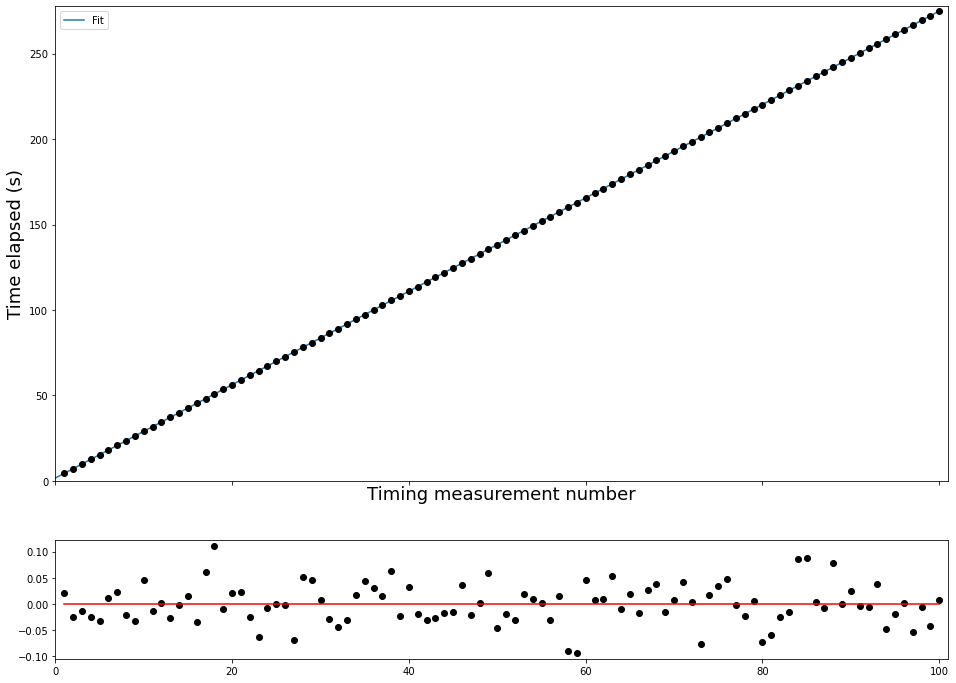

In [36]:
c=np.linspace(0, 100, 10000)

res=t-line(n,a,b)
# Plotting
sig_t = 0.1     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].plot(c, line(c, a, b), label='Fit')
ax[0].legend()
ax[0].errorbar(n, t, yerr=sig_t, color='k', fmt='o')
ax[0].set_xlabel('Timing measurement number', fontsize=18)
ax[0].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0].set(xlim=(0, n[-1]+np.ediff1d(n)[0]), ylim=(0, t[-1]+np.ediff1d(t)[0]))
ax[1].plot(n, res,'o', color='k')
ax[1].plot(n, np.zeros(len(n)), color='r')

(array([ 1.,  2.,  3.,  3.,  5.,  7.,  9.,  3., 12.,  9., 12., 11.,  9.,
         6.,  0.,  2.,  3.,  0.,  1.,  1.]),
 array([2.6119, 2.625 , 2.6381, 2.6512, 2.6643, 2.6774, 2.6905, 2.7036,
        2.7167, 2.7298, 2.7429, 2.756 , 2.7691, 2.7822, 2.7953, 2.8084,
        2.8215, 2.8346, 2.8477, 2.8608, 2.8739]),
 <a list of 20 Patch objects>)

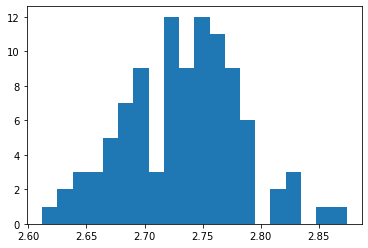

In [14]:
plt.hist(periods, bins=20)

In [19]:
def func_gaussian(x, N, mu, sigma) :
    return N * norm.pdf(x, mu, sigma)

In [20]:
# chi2_gaussian = Chi2Regression(func_gaussian, periods, len(periods), sy)
# chi2_gaussian.errordef = 1
# minuit_gaussian = Minuit(chi2_gaussian, N=99, mu=2.7, sigma=np.sqrt(2.7)) #   
# minuit_gaussian.migrad();       # Perform the actual fit
# Chi2_gau = minuit_gaussian.fval
# Ndof_gau = len(x) - 3           # 3 parameters in fit
# Prob_gau = stats.chi2.sf(Chi2_gau, Ndof_gau)

NameError: name 'x' is not defined

# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.